# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [4]:
cities


['magistralnyy',
 'traralgon',
 'yerbogachen',
 'tasiilaq',
 'sentyabrskiy',
 'albany',
 'christchurch',
 'atuona',
 'whithorn',
 'bambous virieux',
 'talnakh',
 'puerto ayora',
 'bredasdorp',
 'amderma',
 'hobart',
 'ushuaia',
 'saint-malo',
 'baykit',
 'sitka',
 'alice springs',
 'hithadhoo',
 'ende',
 'barrow',
 'virginia beach',
 'jardim',
 'cabo san lucas',
 'rikitea',
 'wichita falls',
 'vaini',
 'umm lajj',
 'tiksi',
 'kruisfontein',
 'pisco',
 'fortuna',
 'mys shmidta',
 'codrington',
 'mataura',
 'georgetown',
 'arraial do cabo',
 'beringovskiy',
 'nikolskoye',
 'comodoro rivadavia',
 'hovd',
 'san carlos de bariloche',
 'jamestown',
 'saint-augustin',
 'luxor',
 'sobolevo',
 'khatanga',
 'yellowknife',
 'jingdezhen',
 'thompson',
 'saskylakh',
 'solnechnyy',
 'cullman',
 'karad',
 'naze',
 'ancud',
 'illoqqortoormiut',
 'sulangan',
 'ahualulco',
 'nizhneyansk',
 'kununurra',
 'jalu',
 'esperance',
 'atambua',
 'hermanus',
 'kavieng',
 'barentsburg',
 'butaritari',
 'belushya 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
     

In [6]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloud_cover = []
city_list = []
country = []
date = []

for city in cities:
    response = requests.get(f"{query_url}&q={city}").json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloud_cover.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
    except KeyError:
        print ("The city was not found.")
  


The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not found.
The city was not

In [7]:
#print(lat)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humidity,
    "wind_speed":wind_speed,
    "cloud_cover":cloud_cover,
    "city_list":city_list,
    "country":country,
    "date":date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

lat     lng   temp  humidity  wind_speed  cloud_cover     city_list  \
0  56.17  107.45  36.59        82        8.86           74  magistralnyy   
1 -38.18  146.53  46.00        96        1.30           98     traralgon   
2  61.28  108.01  28.08        97       10.67          100   yerbogachen   
3  65.61  -37.64  33.80        69        9.17           75      tasiilaq   
4  42.60  -73.97  56.19        33        2.82           98        albany   

  country        date  
0      RU  1588788362  
1      AU  1588788362  
2      RU  1588788362  
3      GL  1588788363  
4      US  1588788363

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
  # None exist in the .describe
idx100 = weather_data[weather_data['humidity'] > 100].index
cleaned_weather_data = weather_data.drop(idx100, inplace=False)
cleaned_weather_data.head()

lat     lng   temp  humidity  wind_speed  cloud_cover     city_list  \
0  56.17  107.45  36.59        82        8.86           74  magistralnyy   
1 -38.18  146.53  46.00        96        1.30           98     traralgon   
2  61.28  108.01  28.08        97       10.67          100   yerbogachen   
3  65.61  -37.64  33.80        69        9.17           75      tasiilaq   
4  42.60  -73.97  56.19        33        2.82           98        albany   

  country        date  
0      RU  1588788362  
1      AU  1588788362  
2      RU  1588788362  
3      GL  1588788363  
4      US  1588788363

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# See above.

In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

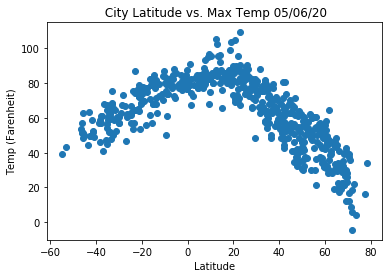

In [12]:
# Scatter Plot City Latitude vs Max Temp
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["temp"], marker = "o")
plt.title(f' City Latitude vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temp (Farenheit)")
plt.xlabel("Latitude")
# The closer to the equator 0 degrees lat, the higher the temps, decending on either side of the midline.

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

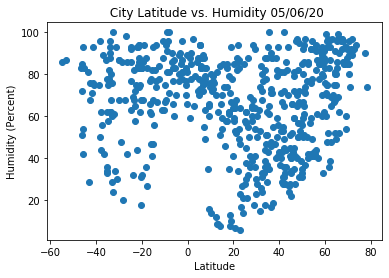

In [13]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["humidity"], marker = "o")
plt.title(f' City Latitude vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

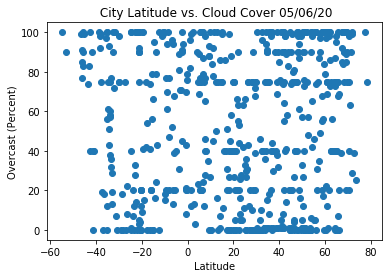

In [14]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["cloud_cover"], marker = "o")
plt.title(f' City Latitude vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

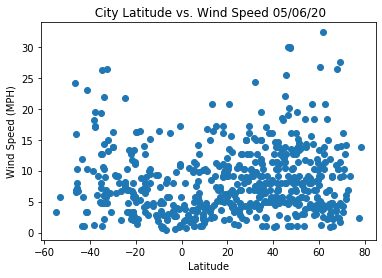

In [15]:
plt.scatter(cleaned_weather_data["lat"], cleaned_weather_data["wind_speed"], marker = "o")
plt.title(f' City Latitude vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [23]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_data.copy()
northern_df = north_df[north_df["lat"] > 0]
northern_df

lat     lng   temp  humidity  wind_speed  cloud_cover       city_list  \
0    56.17  107.45  36.59        82        8.86           74    magistralnyy   
2    61.28  108.01  28.08        97       10.67          100     yerbogachen   
3    65.61  -37.64  33.80        69        9.17           75        tasiilaq   
4    42.60  -73.97  56.19        33        2.82           98          albany   
7    18.26  -78.04  85.14        79       16.11           40        whithorn   
..     ...     ...    ...       ...         ...          ...             ...   
580  48.55  -71.33  48.20        31       12.75           20  saint-ambroise   
581  37.50   61.97  77.00        47        9.17           40          murgab   
582   9.56   44.06  74.68        74        3.02          100        hargeysa   
583  25.36   55.40  83.43        57        4.70            0         sharjah   
584  53.70   -1.78  61.03        42        3.00            0       brighouse   

    country        date  
0        RU  1588788362  
2        RU  1588788362  
3        GL  1588788363  
4        US  1588788363  
7        JM  1588788364  
..      ...         ...  
580      CA  1588788505  
581      TM  1588788506  
582      SO  1588788506  
583      AE  1588788506  
584      GB  1588788506  

[417 rows x 9 columns]

In [22]:
# Create Northern and Southern Hemisphere DataFrames
south_df = weather_data.copy()
southern_df = south_df[south_df["lat"] < 0]
southern_df

lat     lng   temp  humidity  wind_speed  cloud_cover        city_list  \
1   -38.18  146.53  46.00        96        1.30           98        traralgon   
5   -43.53  172.63  44.42        81        1.12           74     christchurch   
6    -9.80 -139.03  80.28        75       16.42           18           atuona   
8   -20.34   57.76  74.62        83        5.82           20  bambous virieux   
10   -0.74  -90.35  80.91        70       17.22           20     puerto ayora   
..     ...     ...    ...       ...         ...          ...              ...   
562 -15.43  -74.62  81.21        41        9.04           56            acari   
563 -32.50  137.77  65.77        24       26.40          100     port augusta   
570 -26.62  -54.13  62.26        42        6.67            8      san vicente   
572 -29.95  -71.34  57.20        87       13.87           75         coquimbo   
573 -10.98  -66.10  83.79        88        2.77          100        riberalta   

    country        date  
1        AU  1588788362  
5        NZ  1588788315  
6        PF  1588788364  
8        MU  1588788181  
10       EC  1588788189  
..      ...         ...  
562      PE  1588788500  
563      AU  1588788501  
570      AR  1588788502  
572      CL  1588788503  
573      BO  1588788503  

[168 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

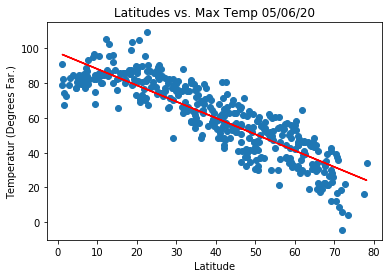

In [52]:
plt.scatter(northern_df["lat"], northern_df["temp"], marker = "o")
plt.title(f'Latitudes vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temperatur (Degrees Far.)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["temp"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")
          ## The further north you go, the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

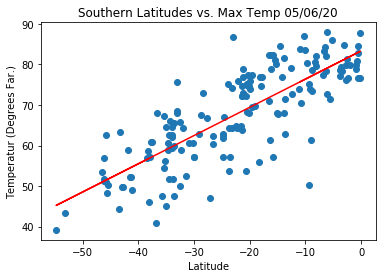

In [53]:
plt.scatter(southern_df["lat"], southern_df["temp"], marker = "o")
plt.title(f'Southern Latitudes vs. Max Temp {time.strftime("%m/%d/%y")}')
plt.ylabel("Temperatur (Degrees Far.)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["temp"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")          
          # Further south it get's very cold, closer to the equator (0), the warmer it is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

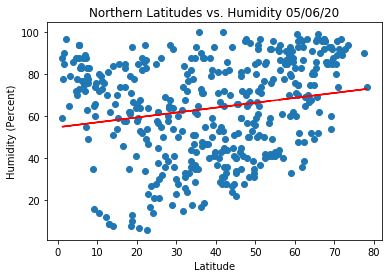

In [55]:
plt.scatter(northern_df["lat"], northern_df["humidity"], marker = "o")
plt.title(f'Northern Latitudes vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["humidity"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")          
          # Mid latitudes are humid as they are impacted with lots of moisture.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

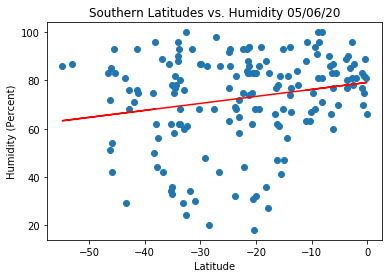

In [56]:
plt.scatter(southern_df["lat"], southern_df["humidity"], marker = "o")
plt.title(f'Southern Latitudes vs. Humidity {time.strftime("%m/%d/%y")}')
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["humidity"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")    
          # Mid latitudes are humid as they are impacted with lots of moisture.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

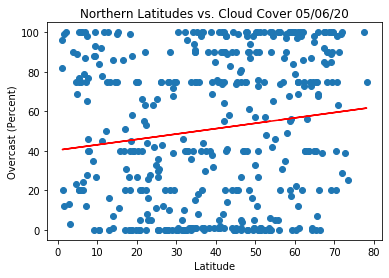

In [58]:
plt.scatter(northern_df["lat"], northern_df["cloud_cover"], marker = "o")
plt.title(f'Northern Latitudes vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["cloud_cover"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")            
          # Scatterd clouds today,,,Just like the northwest.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

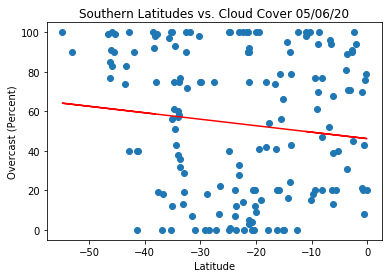

In [59]:
plt.scatter(southern_df["lat"], southern_df["cloud_cover"], marker = "o")
plt.title(f'Southern Latitudes vs. Cloud Cover {time.strftime("%m/%d/%y")}')
plt.ylabel("Overcast (Percent)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["cloud_cover"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")              
          # note the lack of cloud cover frequency in the lower latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

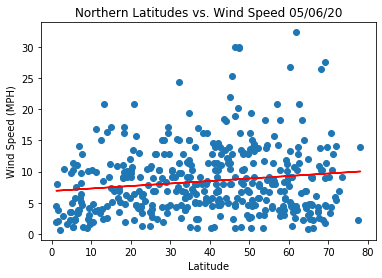

In [60]:
plt.scatter(northern_df["lat"], northern_df["wind_speed"], marker = "o")
plt.title(f'Northern Latitudes vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["lat"], northern_df["wind_speed"])
regress_values = northern_df["lat"] * slope + intercept
plt.plot(northern_df["lat"],regress_values,color = "red")    
          # a seemngly linear activity with a few upshots of wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

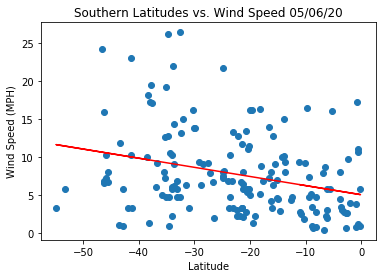

In [61]:
plt.scatter(southern_df["lat"], southern_df["wind_speed"], marker = "o")
plt.title(f'Southern Latitudes vs. Wind Speed {time.strftime("%m/%d/%y")}')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["lat"], southern_df["wind_speed"])
regress_values = southern_df["lat"] * slope + intercept
plt.plot(southern_df["lat"],regress_values,color = "red")              
          # Not real windy in the southern latitudes.